MACHINE LEARNING ASSIGNMENT



importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
from perceptron import Perceptron
from FeatureEng import FeatureEngineering as FE
from random import shuffle
from LogisticRegression import LogisticRegression
import matplotlib.pyplot as plt
from Lda import Fischers
import random
data = pd.read_csv("./dataset.csv")

PERCEPTRON 

PM1

In [ ]:
training_data = data.sample(frac=0.67, random_state=200)
testing_data = data.drop(training_data.index)
epochs = 15000
model = Perceptron(training_data,testing_data)
print("PM1\n")
training_acc = model.train(epochs)
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
plt.plot(range(len(training_acc)), training_acc)
plt.xlabel("epochs")
plt.ylabel("training accuracy")
plt.show()

Data used here is unormalised, thus the training accuracy does not increase and hovers around 93 to 94 % , indicating that isnt linearly seperable 

PM2

PM2

Prediction accuracy is: 0.8882978723404256


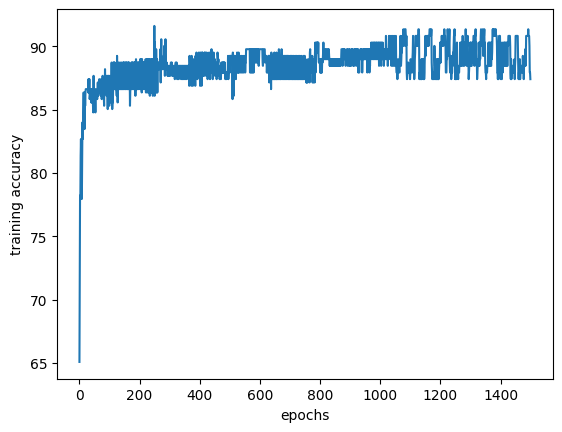

In [8]:
training_data = data.sample(frac=0.67, random_state=0)
testing_data = data.drop(training_data.index)
epochs = 1500
training_data = training_data.sample(frac=1)
model = Perceptron(training_data,testing_data)
print("PM2\n")
training_acc = model.train(epochs)
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
plt.plot(range(len(training_acc)), training_acc)
plt.xlabel("epochs")
plt.ylabel("training accuracy")
plt.show()

Change in order of rows , changes training accuracy and prediction accuracy of the model

PM 3 

PM3

Prediction accuracy is: 0.9574468085106383


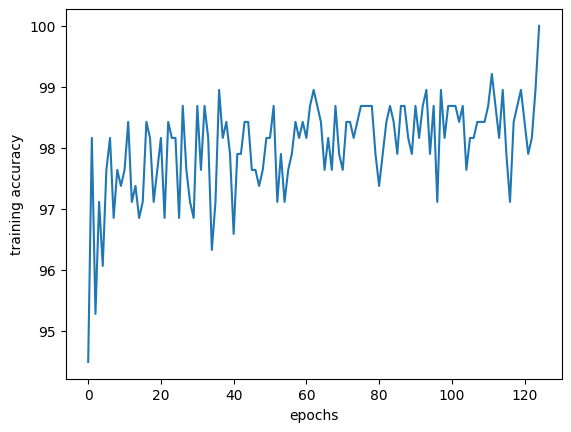

In [12]:
training_data = data.sample(frac=0.67, random_state=200)
testing_data = data.drop(training_data.index)
epochs = 1500
training_data = FE.removenans(training_data)
testing_data = FE.removenans(testing_data)
training_data = FE.normalise(training_data)
testing_data = FE.normalise(testing_data)
model = Perceptron(training_data,testing_data)
print("PM3\n")
training_acc = model.train(epochs)
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
plt.plot(range(len(training_acc)), training_acc)
plt.xlabel("epochs")
plt.ylabel("training accuracy")
plt.show()



Data is normalised , this data is linearly seperable , this can be seen as the training accuracy is 100% and the prediction accuracy is high

PM4

PM4

Prediction accuracy is: 0.925531914893617


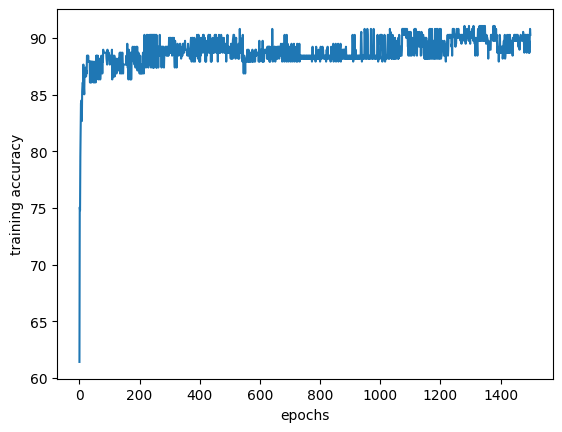

In [10]:
training_data = data.sample(frac=0.67, random_state=0)
testing_data = data.drop(training_data.index)
epochs = 1500
randomise = []
for i in range(2,32):
    randomise.append(i)
shuffle(randomise)
randomise.insert(0,1)
randomise.insert(0,0)
training_data = training_data.iloc[:,randomise]
testing_data = testing_data.iloc[:,randomise]
model = Perceptron(training_data,testing_data)
print("PM4\n")
training_acc = model.train(epochs)
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
plt.plot(range(len(training_acc)), training_acc)
plt.xlabel("epochs")
plt.ylabel("training accuracy")
plt.show()

change in order of features , does not affect the perfomance of the model

LR1 

In [ ]:
training_data = data.sample(frac=0.67, random_state=100)
testing_data = data.drop(training_data.index)


threshold = 0.3
no_train = training_data.shape[0]
training_data = training_data.dropna()
testing_data = testing_data.dropna()
batches = [no_train,32,1]

for i in range(3):
    threshold = 0.3
    if i == 0:
        epochs = 200
    elif i == 1:
        epochs = 20
    elif i == 2:
        epochs = 5
    for j in range(5):
        learning_rate = 0.0001
        for k in range(3):
            model = LogisticRegression(training_data=training_data,testing_data=testing_data,threshold=threshold,learning_rate=learning_rate)
            w,b,cost = model.train(epochs=epochs,batch_size=batches[i])
            cost = pd.DataFrame(cost)
        
            cost = cost.dropna()
            accuracy,precision,recall = model.test()
            print(f"Prediction accuracy is: {accuracy}")
            plt.plot(range(len(cost)),cost)
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title(f"Cost Function {batches[i]} {threshold} {learning_rate}")
            plt.show()
            learning_rate*=10
        threshold+=0.1



Non Normalised data gives an accuracy of around 80-90%, with the algorithm performing poorly with stochastic gradient descent and a high learning rate. Changing the threshold value beetween 0.3,0.4,0.5,0.6,0.7 doesnt chang the prediction accuracy.This means that the algorithm is classifying close to 0 and 1, i.e it is overfitting the data.Changing Learning rate does not give much difference in performance,except in case of stochastic.

LR2

In [ ]:
training_data = data.sample(frac=0.67, random_state=100)
testing_data = data.drop(training_data.index)
training_data = FE.removenans(training_data)
testing_data = FE.removenans(testing_data)
training_data = FE.normalise(training_data)
no_train = training_data.shape[0]
testing_data = FE.normalise(testing_data)
batches = [no_train,32,1]
for i in range(3):
    threshold = 0.3
    if i == 0:
        epochs = 200
    elif i == 1:
        epochs = 20
    elif i == 2:
        epochs = 5
    for j in range(5):
        learning_rate = 0.0001
        for k in range(3):
            model = LogisticRegression(training_data=training_data,testing_data=testing_data,threshold=threshold,learning_rate=learning_rate)
            w,b,cost = model.train(epochs=epochs,batch_size=batches[i])
            cost = pd.DataFrame(cost)
        
            cost = cost.dropna()
            accuracy,precision,recall = model.test()
            print(f"Prediction accuracy is: {accuracy}")
            plt.plot(range(len(cost)),cost)
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title(f"Cost Function {batches[i]} {threshold} {learning_rate}")
            plt.show()
            learning_rate*=10
        threshold+=0.1



Since the data is normalised, the model doesn not overtfit the data, hence there is a difference between the prediction accuracy when we change the threshold. 0.5 gives the best accuracy while the others reduce accuracy. Other Thresholds perform especially poorly with lower learning rates, as higher learning rate reduces cost funciotn more effectively in the same number of epochs. With lower learning rates, the cost curve is more linear.

In general, stochastic gives a higher accuracy than mini batch and batch.

FLDM 1 

In [ ]:
training_data = data.sample(frac=0.67, random_state=200)
testing_data = data.drop(training_data.index)

training_data = FE.removenans(training_data)
testing_data = FE.removenans(testing_data)
training_data = FE.normalise(training_data)
testing_data = FE.normalise(testing_data)
model = Fischers(training_data,testing_data)
X_pos,X_neg,B = model.train()
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
print(f"Decision Boundary = {B}")
y_value = 1
y_pos = np.zeros_like(X_pos) + y_value
y_neg = np.zeros_like(X_neg) + y_value - 0.5
plt.plot(X_pos, y_pos, ls='dotted', c='green',label  = "+ex")
plt.plot(X_neg, y_neg, ls='dotted', c='red',label = "-ex")
plt.axvline(x = B, color = 'b',label = "Bdry")
plt.legend(loc = "upper left")
plt.show()

FLDM2

In [ ]:
training_data = data.sample(frac=0.67, random_state=200)
testing_data = data.drop(training_data.index)
randomise = []
for i in range(2,32):
    randomise.append(i)
shuffle(randomise)
randomise.insert(0,1)
randomise.insert(0,0)
training_data = training_data.iloc[:,randomise]
testing_data = testing_data.iloc[:,randomise]
training_data = FE.removenans(training_data)
testing_data = FE.removenans(testing_data)
training_data = FE.normalise(training_data)
testing_data = FE.normalise(testing_data)
model = Fischers(training_data,testing_data)
X_pos,X_neg,B = model.train()
accuracy,precision,recall = model.test()
print(f"Prediction accuracy is: {accuracy}")
y_value = 1
y_pos = np.zeros_like(X_pos) + y_value
y_neg = np.zeros_like(X_neg) + y_value - 0.5
plt.plot(X_pos, y_pos, ls='dotted', c='green',label  = "+ex")
plt.plot(X_neg, y_neg, ls='dotted', c='red',label = "-ex")
plt.axvline(x = B, color = 'b',label = "Bdry")
plt.legend(loc = "upper left")
plt.show()

Changing the Order of the Features does not affect the performance of the model

Comparitive Study

For the purpose of this study, the gradient descent algorithm used for logistic regression is stochastic gradient descent with learning rate of 0.01 and threshold of 0.5 in order to give the maximum accuracy. The comparisons between different Logistic regressions is shown in the Logistic regression section of this notebook.

In [4]:
pm1a = []
pm1p = []
pm1r = []
pm3a = []
pm3p = []
pm3r = []
pm4a = []
pm4p = []
pm4r = []
fldm1a = []
fldm1p = []
fldm1r = []
fldm2a = []
fldm2p = []
fldm2r = []
lr1a = []
lr1p = []
lr1r = []
lr2a = []
lr2p = []
lr2r = []


for i in range(10):
    seed = random.randint(1,200)
    epochs = 5000
    #PM1
    
    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    
    
    model = Perceptron(training_data,testing_data)
   
    training_acc = model.train(epochs)
    accuracy,precision,recall = model.test()
    pm1a.append(accuracy)
    pm1p.append(precision)
    pm1r.append(recall)

    #PM3

    training_data = FE.removenans(training_data)
    testing_data = FE.removenans(testing_data)
    training_data = FE.normalise(training_data)
    testing_data = FE.normalise(testing_data)
    model2 = Perceptron(training_data,testing_data)
  
    training_acc = model2.train(epochs)
   
    accuracy,precision,recall = model2.test()
    pm3a.append(accuracy)
    pm3p.append(precision)
    pm3r.append(recall)

    #PM4

    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    randomise = []
    for i in range(2,32):
        randomise.append(i)
    shuffle(randomise)
    randomise.insert(0,1)
    randomise.insert(0,0)
    training_data = training_data.iloc[:,randomise]
    testing_data = testing_data.iloc[:,randomise]
    model3 = Perceptron(training_data,testing_data)

    training_acc = model3.train(epochs)
    accuracy,precision,recall = model3.test()
    pm4a.append(accuracy)
    pm4p.append(precision)
    pm4r.append(recall)

    #FLDM1
    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    training_data = FE.removenans(training_data)
    testing_data = FE.removenans(testing_data)
    training_data = FE.normalise(training_data)
    testing_data = FE.normalise(testing_data)
    model4 = Fischers(training_data,testing_data)
   
    X_pos,X_neg,B = model4.train()
    accuracy,precision,recall = model4.test()
    fldm1a.append(accuracy)
    fldm1p.append(precision)
    fldm1r.append(recall)

    #FDLM2
    
    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    randomise = []
    for i in range(2,32):
        randomise.append(i)
    shuffle(randomise)
    randomise.insert(0,1)
    randomise.insert(0,0)
    training_data = training_data.iloc[:,randomise]
    testing_data = testing_data.iloc[:,randomise]
    training_data = FE.removenans(training_data)
    testing_data = FE.removenans(testing_data)
    training_data = FE.normalise(training_data)
    testing_data = FE.normalise(testing_data)
    model5 = Fischers(training_data,testing_data)
    X_pos,X_neg,B = model5.train()
    accuracy,precision,recall = model5.test()
    fldm2a.append(accuracy)
    fldm2p.append(precision)
    fldm2r.append(recall)

    #LR1

    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    epochs = 200
    learning_rate = 0.01
    threshold = 0.5
    no_train = training_data.shape[0]
    training_data = training_data.dropna()
    testing_data = testing_data.dropna()
    model6 = LogisticRegression(training_data=training_data,testing_data=testing_data,threshold=threshold,learning_rate=learning_rate)
    w,b,cost = model6.train(epochs=epochs,batch_size=1)
    accuracy,precision,recall = model6.test()
    lr1a.append(accuracy)
    lr1p.append(precision)
    lr1r.append(recall)

    #LR2

    epochs = 100
    training_data = data.sample(frac=0.67, random_state=seed)
    testing_data = data.drop(training_data.index)
    training_data = FE.removenans(training_data)
    testing_data = FE.removenans(testing_data)
    training_data = FE.normalise(training_data)
    no_train = training_data.shape[0]
    testing_data = FE.normalise(testing_data)
    learning_rate = 0.01
    threshold = 0.5
    model7 = LogisticRegression(training_data=training_data,testing_data=testing_data,threshold=threshold,learning_rate=learning_rate)
    w,b,cost = model7.train(epochs=epochs,batch_size=1)
    accuracy,precision,recall = model7.test()
    lr2a.append(accuracy)
    lr2p.append(precision)
    lr2r.append(recall)



print(f"Mean Accuracy of PM1 = {np.average(pm1a)} +- {np.std(pm1a)}")
print(f"Mean Accuracy of PM3 = {np.average(pm3a)} +- {np.std(pm3a)}")
print(f"Mean Accuracy of PM4 = {np.average(pm4a)} +- {np.std(pm4a)}")
print(f"Mean Accuracy of FLDM1 = {np.average(fldm1a)} +- {np.std(fldm1a)}")
print(f"Mean Accuracy of FLDM2 = {np.average(fldm2a)} +- {np.std(fldm2a)}")
print(f"Mean Accuracy of LR1 = {np.average(lr1a)} +- {np.std(lr1a)}")
print(f"Mean Accuracy of LR2 = {np.average(lr2a)} +- {np.std(lr2a)}\n")

print(f"Mean Precision of PM1 = {np.average(pm1p)} +- {np.std(pm1p)}")
print(f"Mean Precision of PM3 = {np.average(pm3p)} +- {np.std(pm3p)}")
print(f"Mean Precision of PM4 = {np.average(pm4p)} +- {np.std(pm4p)}")
print(f"Mean Precision of FLDM1 = {np.average(fldm1p)} +- {np.std(fldm1p)}")
print(f"Mean Precision of FLDM2 = {np.average(fldm2p)} +- {np.std(fldm2p)}")
print(f"Mean Precision of LR1 = {np.average(lr1p)} +- {np.std(lr1p)}")
print(f"Mean Precision of LR2 = {np.average(lr2p)} +- {np.std(lr2p)}\n")

print(f"Mean Recall of PM3 = {np.average(pm3r)} +- {np.std(pm3r)}")
print(f"Mean Recall of PM1 = {np.average(pm1r)} +- {np.std(pm1r)}")
print(f"Mean Recall of PM4 = {np.average(pm4r)} +- {np.std(pm4r)}")
print(f"Mean Recall of FLDM1 = {np.average(fldm1r)} +- {np.std(fldm1r)}")
print(f"Mean Recall of FLDM2 = {np.average(fldm2r)} +- {np.std(fldm2r)}")
print(f"Mean Recall of LR1 = {np.average(lr1r)} +- {np.std(lr1r)}")
print(f"Mean Recall of LR2 = {np.average(lr2r)} +- {np.std(lr2r)}")




    



Mean Accuracy of PM1 = 0.8877659574468085 +- 0.03853722486527649
Mean Accuracy of PM3 = 0.9510638297872342 +- 0.011358593885139696
Mean Accuracy of PM4 = 0.8877659574468085 +- 0.03853722486527649
Mean Accuracy of FLDM1 = 0.9579787234042554 +- 0.019097152203208786
Mean Accuracy of FLDM2 = 0.9579787234042554 +- 0.019097152203208786
Mean Accuracy of LR1 = 0.8618748614759758 +- 0.05701450045988182
Mean Accuracy of LR2 = 0.973936170212766 +- 0.012000546992211139

Mean Precision of PM1 = 0.8362051837396958 +- 0.10748748064661912
Mean Precision of PM3 = 0.9317903345784213 +- 0.03443020339992562
Mean Precision of PM4 = 0.8362051837396958 +- 0.10748748064661912
Mean Precision of FLDM1 = 0.9351064361859835 +- 0.04670658367893654
Mean Precision of FLDM2 = 0.9351064361859835 +- 0.04670658367893654
Mean Precision of LR1 = 0.8339651094933307 +- 0.137675355301447
Mean Precision of LR2 = 0.9721580905813056 +- 0.03685155593328559

Mean Recall of PM3 = 0.937088041583878 +- 0.025649664345208545
Mean Reca

COMPARITIVE STUDY 

The best perfoming model based on the comparitive study was seen to be LR2 , for all perfomance metrics i.e. accuracy,precision and recall it had the highest mean values as well as low deviations.

Why we think LR2 is the best perfoming model is :

1.Logistic regression coeffecients can be interpreted as feature weights, this is helpful as we can then find the features which are most important for classification. Linear discriminant analysis can also provide interpretable weights, but perceptron weights are not easily interpretable

2.In contrast to Logistic regression , preceptron and linear discriminant analsyis do not provide direct probability estimates

3.Perceptron only converges for linearly seperable data, and may oscillate for non seperable. However linear discriminant analysis and logistic regression are guarenteed to converge for any dataset

4.LR2 can be considered better than LR1; on changing the probability descision threshold for LR1 between 0.3 to 0.7 the LR1 precision accuracy had minimal change, indicating that LR1 is overfitting the data. However LR2 reacts to the change in probability threshold 
 

